 Coina and dice.

 1.- Random Variables
 
 2.- Coins

 3.- Dices
 
  3.1.- Quantum dice
 
    


1.- Random Variables

Loosely speaking, a random variable can be considered an expression whose value is the realization or outcome of events associated with an experiment. The values of a random variable are real, though some variables such as the number of cars on the street at some moment of the day can only take discrete values. In general, random variables can be real, discrete, or a mixture of both. 
Mathematically speaking, a random variable is a function that associates events with real numbers.
This is: $X: \Omega \rightarrow \mathbb{R}$

Suppose we have an experiment whose results are: $A_{1}, A_{2}, ... , A_{k}$

If we perform the experiment once we'll obtain one of these possible outcomes.

If we perform the experiment a second time we may obtain the same or any other outcome.

If we perform the experiment N times we can define the following:

$p(A_{k}) = \frac{n_{k}}{N}$ as the probability of getting $A_{k}$
Where $n_{k}$ is the number of times we got $A_{k}$ as a result.

Notice that $\sum_{k}^{N}p(A_{k}) = 1 $




2.- Coins

Let's begin with a classic example, a fair coin. The experiment is tossing a coin whose possible outcomes are Head or Tail. We can associate our random variable to 0, if the coin landed head, and 1 otherwise $X:\left\{\text{H},\text{T}\right\}\rightarrow\left\{0,1\right\}$
. 
We call $E = \left\{0,1\right\}$ the sample space. The natural question arises, What is the probability of getting either head or tail?  

We can infer the result by doing to following: We have two possible outcomes head and tail, and one chance at the time of getting one of these, which means $p(X =\text{H} ) = \frac{1}{2}$ This is called **Subjective probability**: It is a type of probability derived from an individual's personal judgment or own experience about whether a specific outcome is likely to occur. It contains no formal calculations and only reflects the subject's opinions and past experience.

Using this we can compute the probability of getting a tail:

$p(X =\text{T}) = 1 - p(X =\text{H} )  = 1 -\frac{1}{2} = \frac{1}{2}$


$p(X = 1) = p(X = 0) = \frac{1}{2}$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

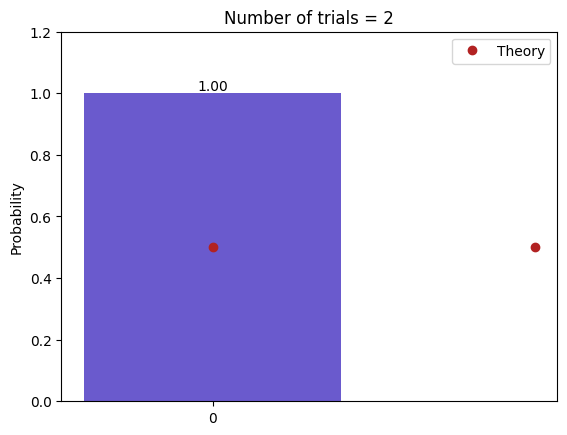

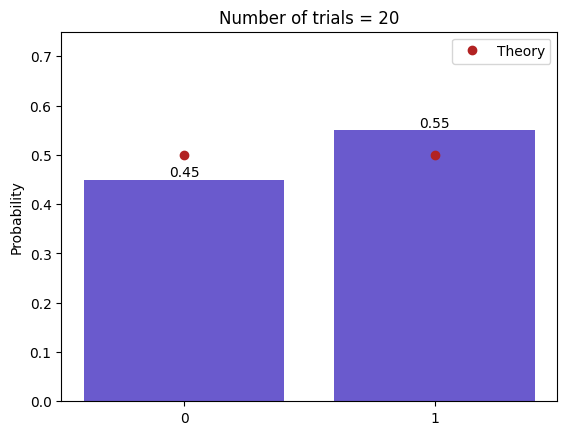

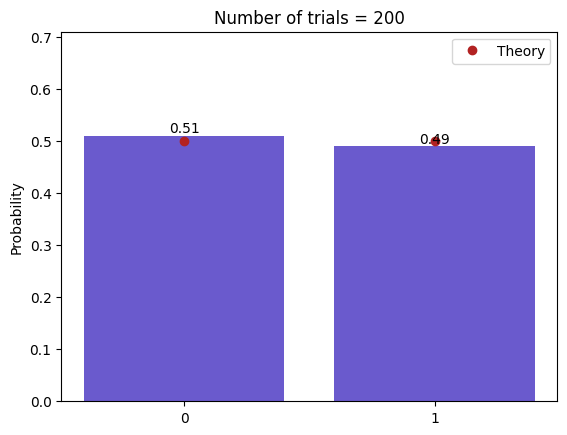

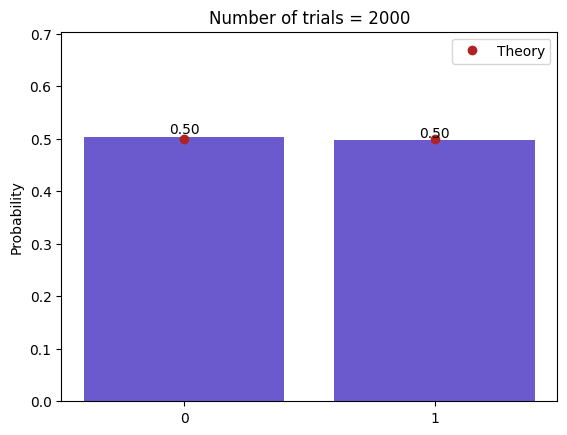

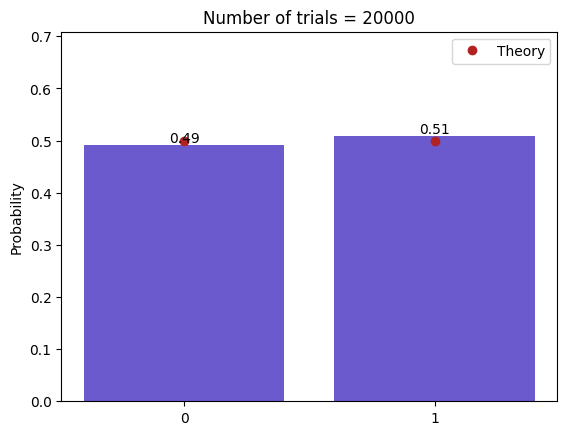

In [ ]:
for n in ([2*10**m for m in range(5)]):    #For 2, 20, 200, 2000, 20000 
  c = np.random.choice([0,1], size = n)    # Either 0 or 1 randomly
  labels,counts = np.unique(c, return_counts=True) #labels = 0, 1. counts = #of times we got 0 or 1 
  counts = counts/n #Probability
  plt.plot([0,1], [0.5,0.5], 'o', color = 'firebrick', label = 'Theory') #theory
  bar_conteiner = plt.bar(labels, counts, align='center', color = 'slateblue')
  plt.title('Number of trials = ' + str(n))
  plt.ylabel('Probability')
  plt.gca().set_xticks(labels)
  plt.bar_label(bar_conteiner,fmt='%.2f')
  plt.ylim(0, max(counts)  + 0.2 ) 
  plt.legend(loc = 'best')
  plt.show() 

2.1 Two coins.

In this scenario, we have the following outcomes two fair coins.

E $ = \left\{\text{HH},\text{HT},\text{TH},\text{TT}\right\}$

Then $p(\text{HH}) = p(\text{H})p(\text{H}) = \frac{1}{2}\cdot\frac{1}{2} = \frac{1}{4}$

$p(\text{HH}) = p(\text{HT}) = p(\text{TH}) = p(\text{TT}) = \frac{1}{4}$

Changing H and T for 0 and 1, each coin is described by $n_{1}, n_{2}$ which is 1 if the coin lands head and 0 other case. 

$n_{i} = \left\{0,1\right\}$ and $p(n_{i} = 0) = p(n_{i}= 1) = \frac{1}{2}$ for $i = 0,1$

Define $n = n_{1} + n_{2}$ the number of heads landed.

$\begin{bmatrix}n_{1} & n_{2} & n =n_{1} + n_{2} \\0 & 0&0 \\0&1&1\\1&0&1\\1&1&2 \end{bmatrix}$

There are 4 outcomes in total. 4 '*micro-states*', each is equally probable, in this case $p(n_{1},n_{2}) = \frac{1}{4}$ $\forall n_{1},n_{2}$

The possible states for $n$ are $n = 0, n = 1, n = 2$. Three possible '*macro-states*'.

The macro-states do not have the same probability, because there may be a diffent number of micro-states in each macro-state.

$p(n_{1} = 0) = p(n_{2} = 2) = \frac{1}{4}$ and $p(n = 1) = \frac{1}{2}$, in this case $p(n = 1)$ is the most probable macro-state.

Let's do it numerically.

In [ ]:
def combinations(x, iter = 1,memo = {}):

  """

  """
  seq = tuple(x + [iter],)

  if seq in memo:
    return memo[seq]
    
  if iter == 0:
    return []

  if iter == 1:
    return [[m] for m in x]

  l = []
  for row in combinations( x, iter - 1, memo ):
    for n in x:
      l.append(row + [n])
  memo[seq] = l  
  #print(memo)        
  return memo[seq]    

In [ ]:
#Outcomes
for i,com in enumerate(combinations([0,1], iter = 2)):
  print(i+1,':',com)

1 : [0, 0]
2 : [0, 1]
3 : [1, 0]
4 : [1, 1]


In [ ]:
#number of heads according to the possible combinations
for n in np.sum( combinations([0,1], iter = 2), axis = 1 ):
  print('n=', n)

n= 0
n= 1
n= 1
n= 2


In [ ]:
outcomes = combinations([0,1], iter = 2)
e = np.sum(outcomes, axis = 1)
lab, prob = np.unique(e, return_counts = True)
prob = prob/len(e)


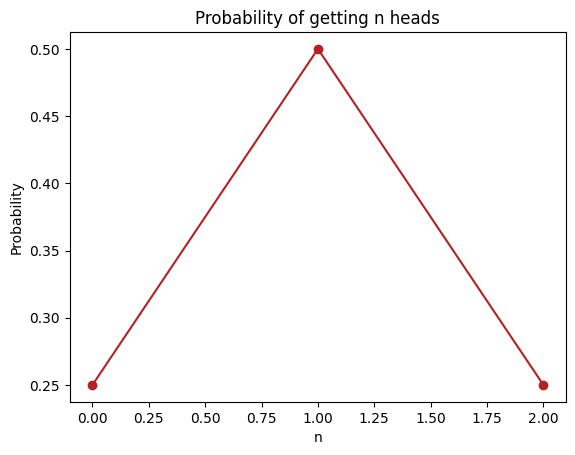

In [ ]:
plt.plot(lab, prob, '-o' , color = 'firebrick')
plt.ylabel('Probability')
plt.xlabel('n')
plt.title('Probability of getting n heads')
plt.show()

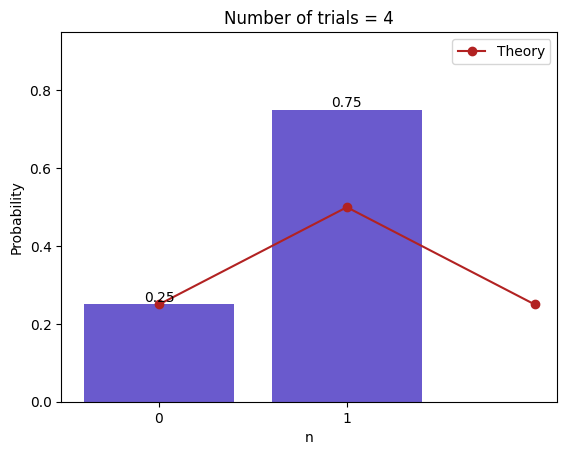

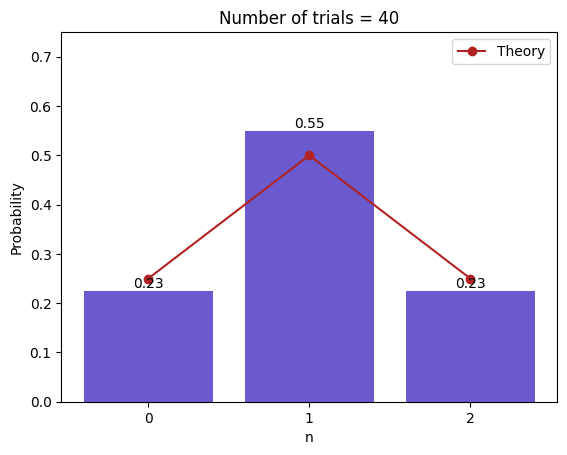

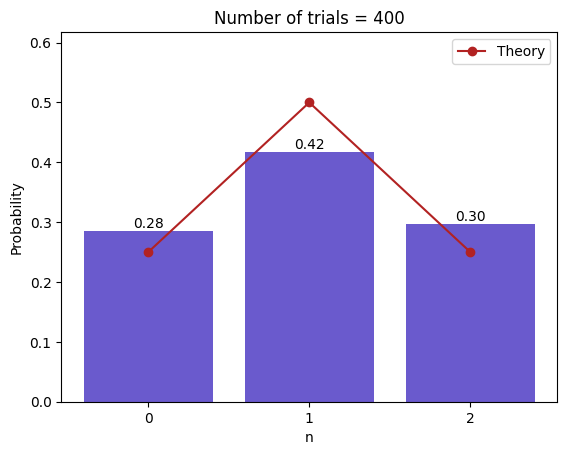

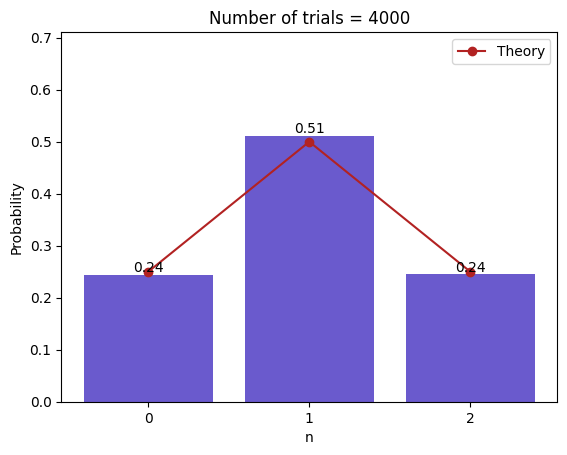

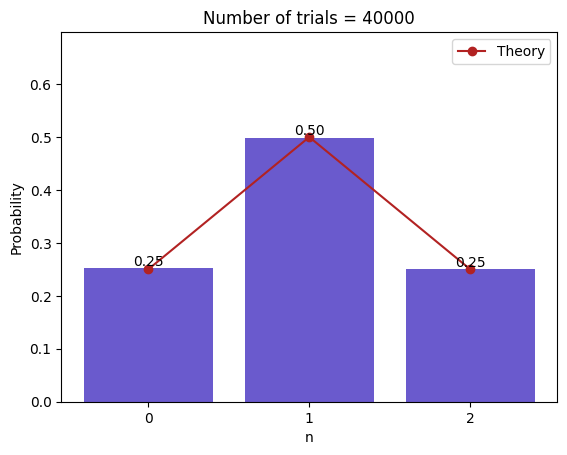

In [ ]:
for n in ([4*10**m for m in range(5)]):
  
  c = np.sum( np.random.choice([0,1], size = (n,2)), axis = 1)
  labels,counts = np.unique(c, return_counts=True)
  counts = counts/n
  bar_conteiner = plt.bar(labels, counts, align='center', color = 'slateblue')
  plt.plot(lab, prob, '-o', color = 'firebrick', label = 'Theory')

  plt.title('Number of trials = ' + str(n))
  plt.ylabel('Probability')
  plt.xlabel('n')

  plt.gca().set_xticks(labels)
  plt.bar_label(bar_conteiner,  fmt='%.2f')
  plt.ylim(0, max(counts) + 0.2 )
  plt.legend() 
  plt.show() 

Eight coins just for fun. In this case, we have $2^{8}$ = 256 outcomes. $n_{i} = 0,1 \forall i \in [1,8]$ and $n = \sum_{i=1}^{8} n_{i} $.

The possible outcomes and values of $n$ are

In [ ]:
outcomes = combinations([0,1], iter = 8)
e = np.sum(outcomes, axis = 1)
lab, prob = np.unique(e, return_counts = True)
prob = prob/len(e)
#plt.plot(lab, prob)
#plt.show()

In [ ]:
for n, m in zip(outcomes, e):
  print( 'n =', m, ': ', n)

n = 0 :  [0, 0, 0, 0, 0, 0, 0, 0]
n = 1 :  [0, 0, 0, 0, 0, 0, 0, 1]
n = 1 :  [0, 0, 0, 0, 0, 0, 1, 0]
n = 2 :  [0, 0, 0, 0, 0, 0, 1, 1]
n = 1 :  [0, 0, 0, 0, 0, 1, 0, 0]
n = 2 :  [0, 0, 0, 0, 0, 1, 0, 1]
n = 2 :  [0, 0, 0, 0, 0, 1, 1, 0]
n = 3 :  [0, 0, 0, 0, 0, 1, 1, 1]
n = 1 :  [0, 0, 0, 0, 1, 0, 0, 0]
n = 2 :  [0, 0, 0, 0, 1, 0, 0, 1]
n = 2 :  [0, 0, 0, 0, 1, 0, 1, 0]
n = 3 :  [0, 0, 0, 0, 1, 0, 1, 1]
n = 2 :  [0, 0, 0, 0, 1, 1, 0, 0]
n = 3 :  [0, 0, 0, 0, 1, 1, 0, 1]
n = 3 :  [0, 0, 0, 0, 1, 1, 1, 0]
n = 4 :  [0, 0, 0, 0, 1, 1, 1, 1]
n = 1 :  [0, 0, 0, 1, 0, 0, 0, 0]
n = 2 :  [0, 0, 0, 1, 0, 0, 0, 1]
n = 2 :  [0, 0, 0, 1, 0, 0, 1, 0]
n = 3 :  [0, 0, 0, 1, 0, 0, 1, 1]
n = 2 :  [0, 0, 0, 1, 0, 1, 0, 0]
n = 3 :  [0, 0, 0, 1, 0, 1, 0, 1]
n = 3 :  [0, 0, 0, 1, 0, 1, 1, 0]
n = 4 :  [0, 0, 0, 1, 0, 1, 1, 1]
n = 2 :  [0, 0, 0, 1, 1, 0, 0, 0]
n = 3 :  [0, 0, 0, 1, 1, 0, 0, 1]
n = 3 :  [0, 0, 0, 1, 1, 0, 1, 0]
n = 4 :  [0, 0, 0, 1, 1, 0, 1, 1]
n = 3 :  [0, 0, 0, 1, 1, 1, 0, 0]
n = 4 :  [0, 0

i.e. $1 \leq n \leq 8$

The most probable macro-state is when $n=4$, it makes sense since each coin has a 50\% of a chance of landing either head or tail.

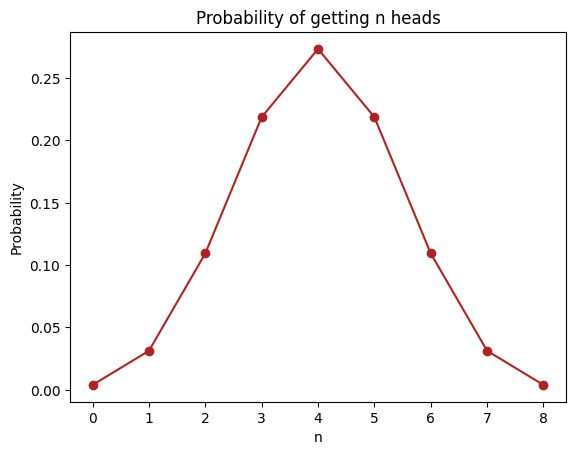

In [ ]:
plt.plot(lab, prob, '-o' , color = 'firebrick')
plt.ylabel('Probability')
plt.xlabel('n')
plt.title('Probability of getting n heads')
plt.show()

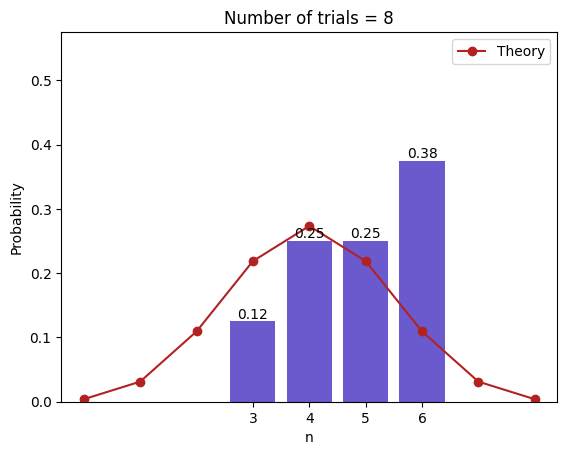

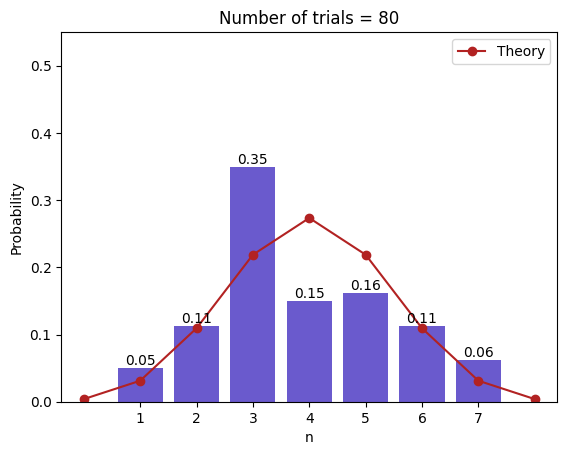

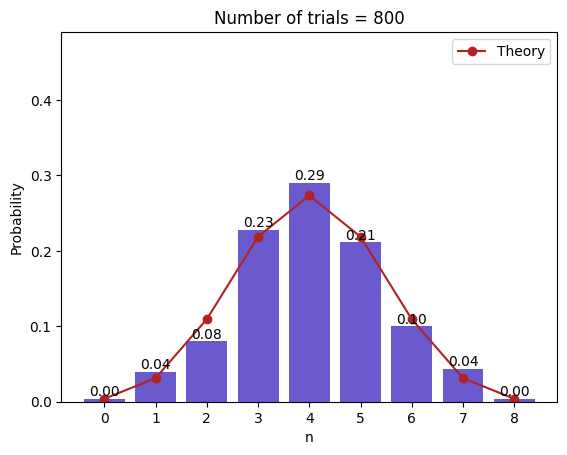

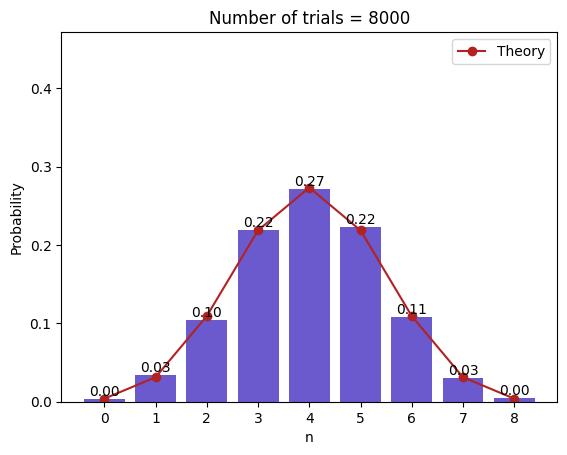

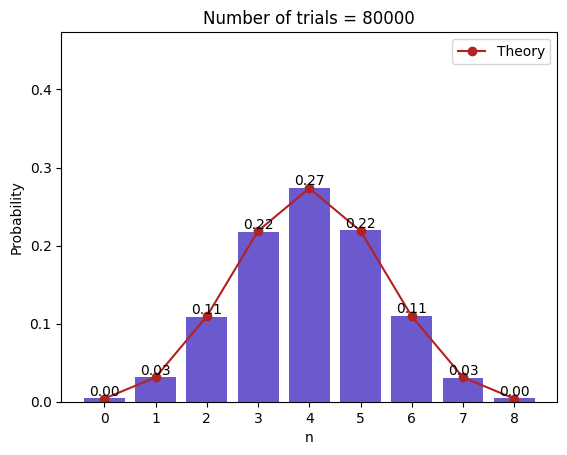

In [ ]:
for n in ([8*10**m for m in range(5)]):
  c = np.sum( np.random.choice([0,1], size = (n,8)), axis = 1)
  labels, counts = np.unique(c, return_counts=True)
  counts = counts/n
  plt.plot(lab, prob, '-o', color = 'firebrick', label = 'Theory')
  bar_conteiner = plt.bar(labels, counts, align='center', color = 'slateblue')
  plt.title('Number of trials = ' + str(n))
  plt.ylabel('Probability')
  plt.xlabel('n')
  plt.gca().set_xticks(labels)
  plt.bar_label(bar_conteiner, fmt = '%.2f')
  plt.ylim(0, max(counts) + 0.2 ) 
  plt.legend()
  plt.show() 

For $N$ coins, each micro-state can be described as a sequence of $N$ numbers $(n_{1},n_{2}, \dots, n_{N})$ and $n = \sum_{i}^{N}n_{i}$

The probability of each micro-state is 

$p(n_{1},n_{2}, \dots, n_{N}) = p(n_{1})\cdot p(n_{2})\cdot \dots p(n_{N}) = \frac{1}{2} \cdot \dots \frac{1}{2}  = \frac{1}{2^{N}}$ 

Lucky for us the total number of micro-states is:

$\Omega(n,N) = \left(\begin{array}{c}N\\ n\end{array}\right) = \frac{N!}{n!(N-n)!}$

To find the probability of a macro-state, we must count how many micro-states result in a particular macro-state and divide by the probability of each micro-states which is $2^{-N}$

Then the probability of a particular macro-state $n$ is:

$p(n) =\frac{1}{2^{N}} \left(\begin{array}{c}N\\ n\end{array}\right) = \frac{1}{2^{N}} \frac{N!}{n!(N-n)!}$



Binomial distribution

The binomial distribution describes the case where we have a sequence of $N$ identical, independent trials with discrete outcomes $n_{i}$, $i = 1, \dots, N$ (Often called a Bernoulli process)

$\forall N$ independent random variables $n_{i}$, with the same distribution of outcomes, the sum $n = \sum n_{i}$ is described by a binomial distribution $p(n)$

$p(n) =\left(\begin{array}{c}N\\ n\end{array}\right) p^{n} (1-p)^{N-n}$

We'll see one more example using the same approach.

3.- Dice

With 1 dice the problem is bored, we have six possibilities (E = $\left\{1,2,3,4,5,6\right\}$) equally likely, i.e., $p(n_{i}) = \frac{1}{6}$


In this case, the minus one deletes the possibility of getting zero:
$\Omega(n,N) = \left(\begin{array}{c}N-1\\ n-1\end{array}\right) = \frac{(N-1)!}{(n-1)!(N-n-1)!}$

$n = 1$ then $\Omega(1,N) = 1$

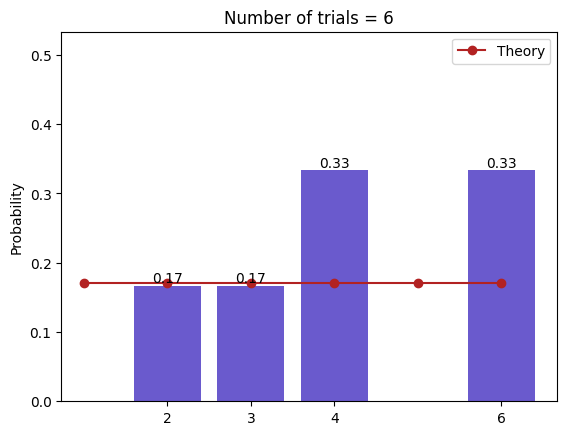

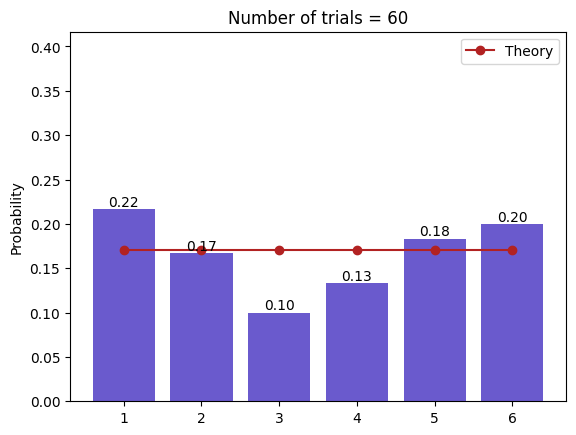

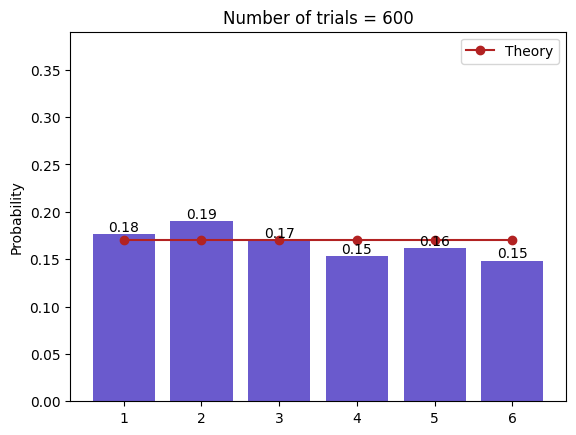

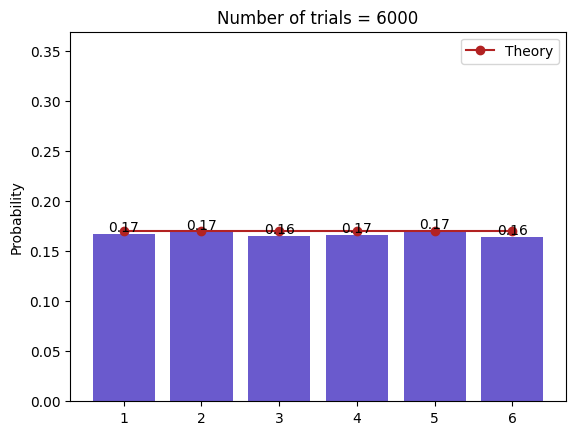

In [ ]:
for n in ([6*10**m for m in range(4)]):
  c = np.random.choice([1,2,3,4,5,6], size = n)
  labels,counts = np.unique(c, return_counts=True)
  counts = counts/n
  
  bar_conteiner = plt.bar(labels, counts, align='center', color = 'slateblue')
  plt.plot([1,2,3,4,5,6], [0.17,0.17,0.17,0.17,0.17,0.17], '-o', color = 'firebrick', label = 'Theory')
  plt.title('Number of trials = ' + str(n))
  plt.ylabel('Probability')
  plt.gca().set_xticks(labels)
  plt.bar_label(bar_conteiner, fmt = '%.2f')
  plt.ylim(0, max(counts) + 0.2 )
  plt.legend() 
  plt.show() 

Dice



Two dice:


$\text{E} = \left\{(1,1),(1,2),(1,3),(1,4),(1,5),(1,6),(2,1),(2,2),(2,3),(2,4),(2,5),(2,6),(3,1),(3,2),(3,3),(3,4),(3,6),(3,6),(4,1),(4,2),(4,3),(4,4),(4,5),(4,6),(5,1),(5,2),(5,3),(5,4),(5,5),(5,6),(6,1),(6,2),(6,3),(6,4),(6,5),(6,6) \right\}$ 

$\text{E}' = \left\{2,3,4,5,6,7,8,9,10,11,12\right\}$ 

$6\cdot6 = 6^{2} = 36$ outcomes 

then $p(n_{1}, n_{2}) = \frac{1}{6^{2}} = \frac{1}{36}$

$N = n_{1} + n_{2}, N \in \text{E}'$ 

For this particular case:

$\Omega(n,N) = \left(\begin{array}{c}N-1\\ n-1\end{array}\right) $ if $N \leq 7 $

$\Omega(n,N) = \left(\begin{array}{c}14-N-1\\ n-1\end{array}\right)$ if $N > 7$

In [ ]:
outcomes = combinations([1,2,3,4,5,6], iter = 2)
e = np.sum(outcomes, axis = 1)
lab, prob = np.unique(e, return_counts = True)
prob = prob/len(e)
#print('Outcomes: ',outcomes)
#print('E =',e)
#print('Probability':,prob)

$2 \leq N \leq 12$

In [ ]:
for n, m in zip(outcomes, e):
  print( 'N =', m, ': ', n)

N = 2 :  [1, 1]
N = 3 :  [1, 2]
N = 4 :  [1, 3]
N = 5 :  [1, 4]
N = 6 :  [1, 5]
N = 7 :  [1, 6]
N = 3 :  [2, 1]
N = 4 :  [2, 2]
N = 5 :  [2, 3]
N = 6 :  [2, 4]
N = 7 :  [2, 5]
N = 8 :  [2, 6]
N = 4 :  [3, 1]
N = 5 :  [3, 2]
N = 6 :  [3, 3]
N = 7 :  [3, 4]
N = 8 :  [3, 5]
N = 9 :  [3, 6]
N = 5 :  [4, 1]
N = 6 :  [4, 2]
N = 7 :  [4, 3]
N = 8 :  [4, 4]
N = 9 :  [4, 5]
N = 10 :  [4, 6]
N = 6 :  [5, 1]
N = 7 :  [5, 2]
N = 8 :  [5, 3]
N = 9 :  [5, 4]
N = 10 :  [5, 5]
N = 11 :  [5, 6]
N = 7 :  [6, 1]
N = 8 :  [6, 2]
N = 9 :  [6, 3]
N = 10 :  [6, 4]
N = 11 :  [6, 5]
N = 12 :  [6, 6]


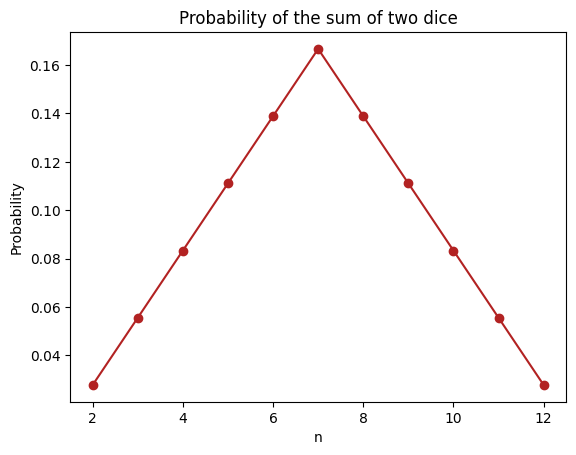

In [ ]:
plt.plot(lab, prob, '-o' , color = 'firebrick')
plt.ylabel('Probability')
plt.xlabel('n')
plt.title('Probability of the sum of two dice')
plt.show()

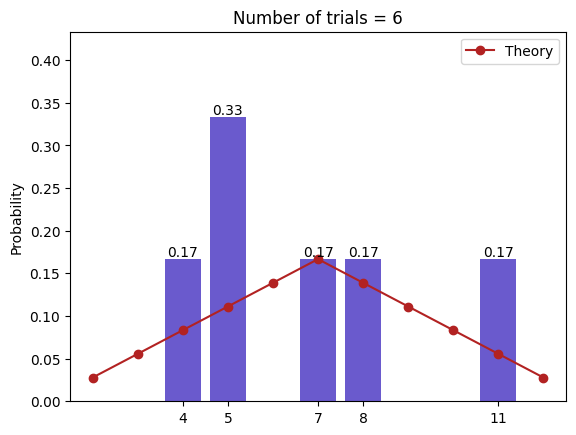

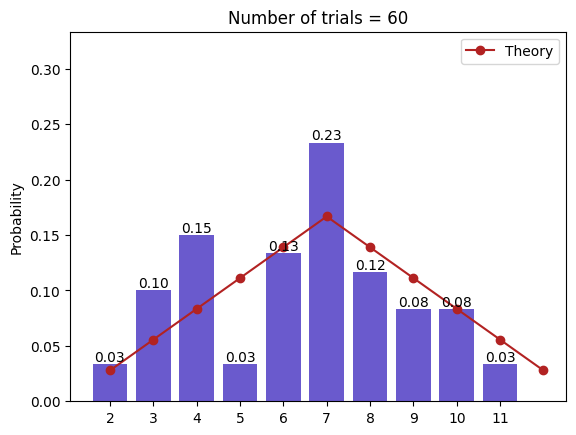

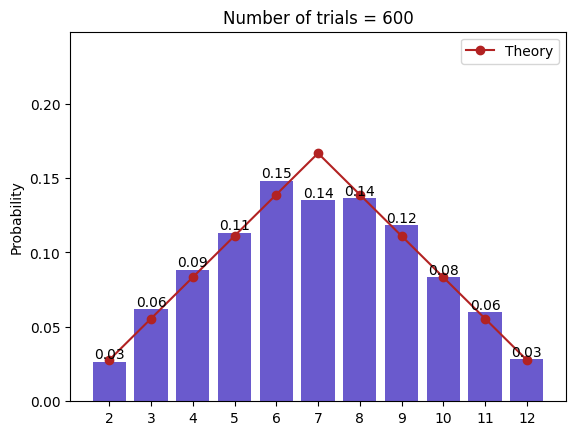

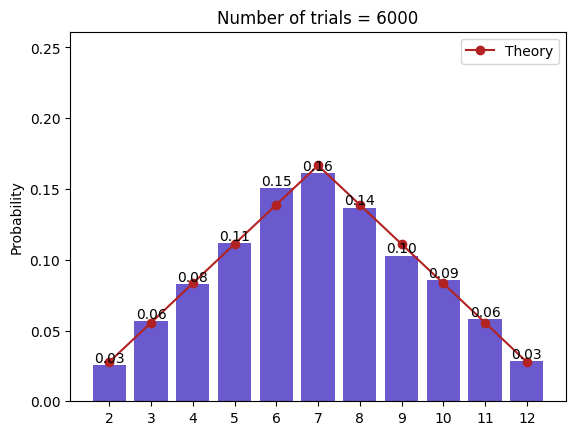

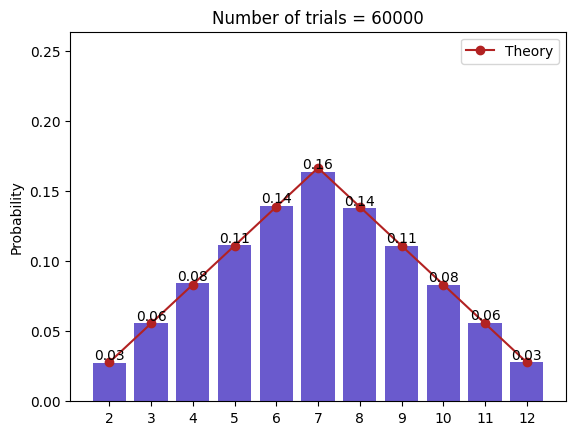

In [ ]:
for n in ([6*10**m for m in range(5)]):
  
  c = np.sum( np.random.choice([1,2,3,4,5,6], size = (n,2)), axis = 1)
  labels,counts = np.unique(c, return_counts=True)
  counts = counts/n
  
  bar_conteiner = plt.bar(labels, counts, align='center', color = 'slateblue')
  plt.plot(lab, prob, '-o', color = 'firebrick', label = 'Theory')
  plt.title('Number of trials = ' + str(n))
  plt.ylabel('Probability')
  plt.gca().set_xticks(labels)
  plt.bar_label(bar_conteiner, fmt = '%.2f')
  plt.ylim(0, max(counts) + 0.1 )
  plt.legend() 
  plt.show() 

Thre dices

In this case we have $6\cdot6\cdot6 = 6^{3} = 216$ outcomes

In general, we have $6^{n}$ outcomes, where $n$ is the number of dice.

then $p(n_{1}, n_{2}, n_{3}) = \frac{1}{6^{3}} = \frac{1}{216}$



$N = n_{1} + n_{2} + n_{3}, N \in [3,18]$ 

In [ ]:
outcomes = combinations([1,2,3,4,5,6], iter = 3)
e = np.sum(outcomes, axis = 1)
lab, prob = np.unique(e, return_counts = True)
prob = prob/len(e)
#print('Outcomes: ',outcomes)
#print('E =',e)
#print('Probability':,prob)

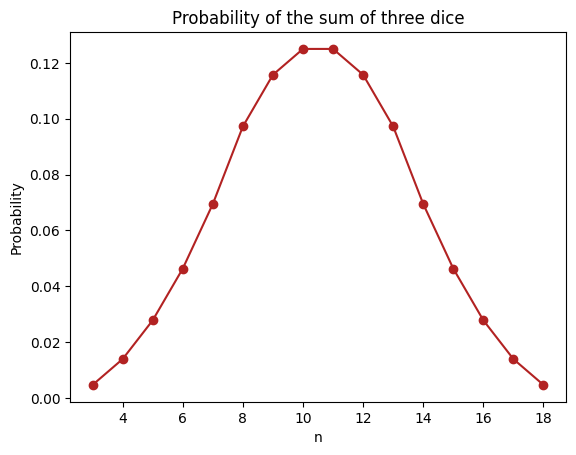

In [ ]:
plt.plot(lab, prob, '-o' , color = 'firebrick')
plt.ylabel('Probability')
plt.xlabel('n')
plt.title('Probability of the sum of three dice')
plt.show()

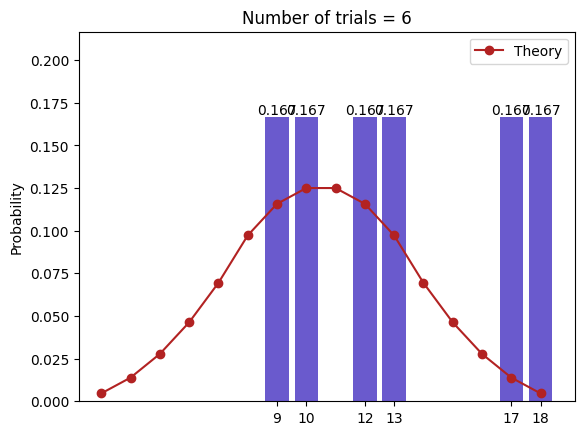

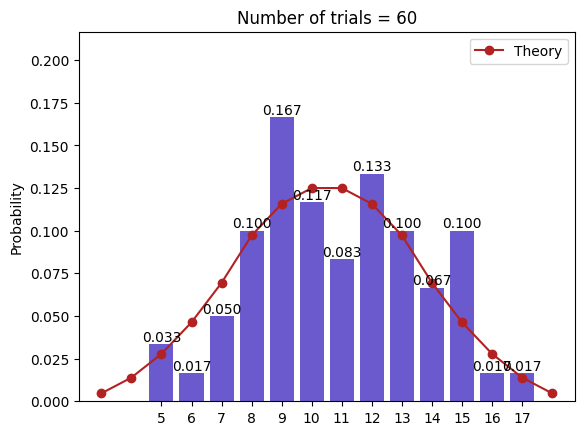

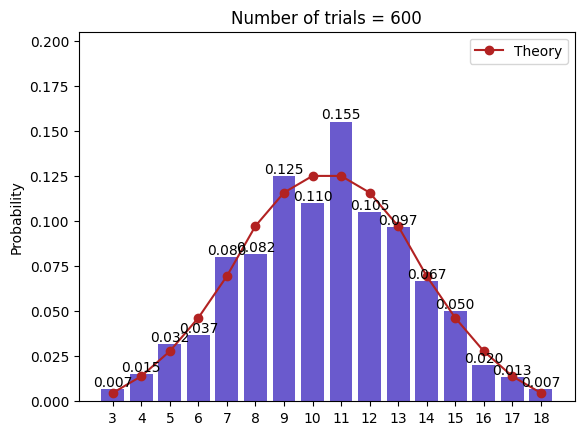

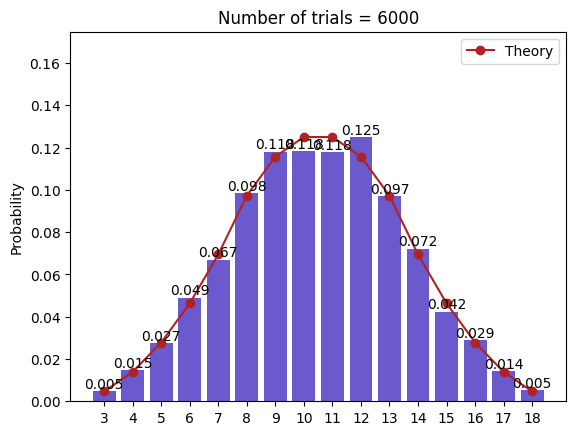

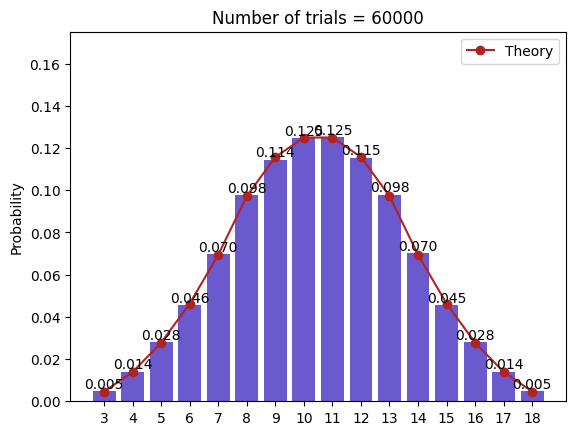

In [ ]:
for n in ([6*10**m for m in range(5)]):
  
  c = np.sum( np.random.choice([1,2,3,4,5,6], size = (n,3)), axis = 1)
  labels,counts = np.unique(c, return_counts=True)
  counts = counts/n
  
  bar_conteiner = plt.bar(labels, counts, align='center', color = 'slateblue')
  plt.plot(lab, prob, '-o', color = 'firebrick', label = 'Theory')
  plt.title('Number of trials = ' + str(n))
  plt.ylabel('Probability')
  plt.gca().set_xticks(labels)
  plt.bar_label(bar_conteiner, fmt = '%.3f')
  plt.ylim(0, max(counts) + 0.05 )
  plt.legend() 
  plt.show() 

In general for both examples when $N$ becomes larger the binomial distribution approaches that of a Gaussian (or Normal) distribution.

$ \lim_{N \rightarrow \infty} P(k|N,p) = \lim_{N \rightarrow \infty} \left(\begin{array}{c}N\\ k\end{array}\right) p^{k}(1-p)^{
N-k} \approx \mathcal{N}(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}}exp\left(-\frac{\left(x-\mu\right)^{2}}{2\sigma^{2}}\right)$

Where $\mu$ is the mean: $\mu = \langle x \rangle = \sum_{i=1}^{N} = \frac{1}{N}x_{i}$

And $\sigma^{2}$ the variance:  $\sigma^{2} = \langle (x - \mu)^{2} \rangle $ 


In [ ]:
def normal(x, mu = 0 , s = 1):
  return (1/np.sqrt(2*np.pi*s**2))*np.exp(-1*((x-mu)**2)/(2*s**2))


In [ ]:
x = np.linspace(-4,4,100)

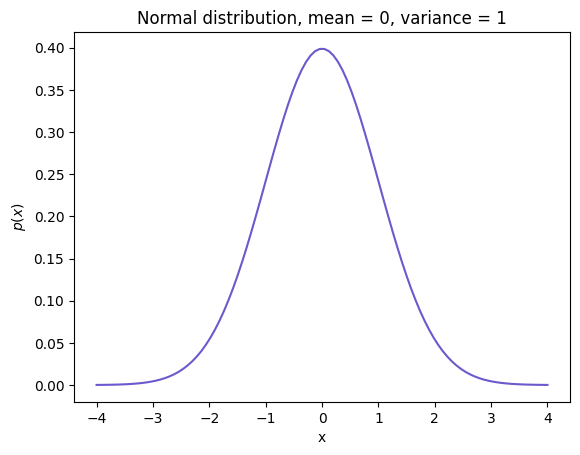

In [ ]:
plt.plot(x, normal(x), color = 'slateblue')
plt.title('Normal distribution, mean = 0, variance = 1')
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.show()

In [ ]:
outcomes = combinations([0,1], iter = 20)
e = np.sum(outcomes, axis = 1)
lab, prob = np.unique(e, return_counts = True)
prob = prob/len(e)


In [ ]:
x1 = np.linspace(min(e) , max(e) ) 

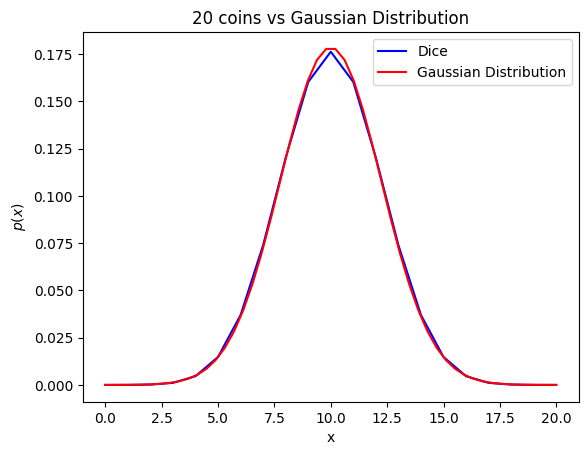

In [ ]:
plt.plot(lab, prob, color = 'blue', label =  'Dice')
plt.plot(x1, normal(x1, np.mean(e), np.std(e)), color = 'red', label = 'Gaussian Distribution')
plt.title('20 coins vs Gaussian Distribution')
plt.legend(loc = 'best')
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.show()


In [ ]:
outcomes1 = combinations([1,2,3,4,5,6], iter = 5)
e1 = np.sum(outcomes, axis = 1)
lab1, prob1 = np.unique(e1, return_counts = True)
prob1 = prob1/len(e1)
#print('Outcomes: ',outcomes)
#print('E =',e)
#print('Probability':,prob)

In [ ]:
x2 = np.linspace(min(e1) , max(e1) ) 

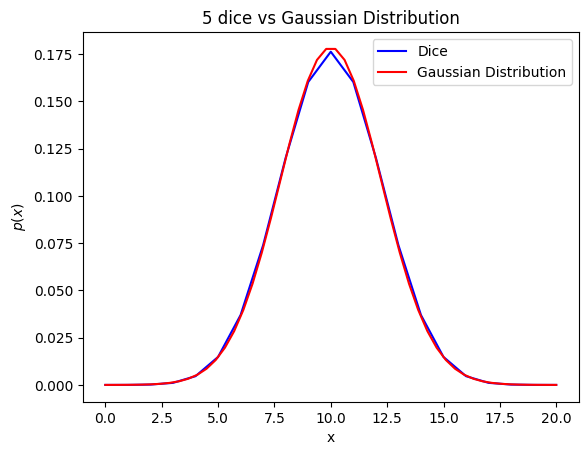

In [ ]:
plt.plot(lab1, prob1, color = 'blue', label =  'Dice')
plt.plot(x2, normal(x2, np.mean(e1), np.std(e1)), color = 'red', label = 'Gaussian Distribution')
plt.title('5 dice vs Gaussian Distribution')
plt.legend(loc = 'best')
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.show()


Quite similar! Despite the fact, the number of dice or coins is not even close to infinity.

Quantum dice.

Imagine an unusual 'three-sided' dice, which when rolled, shows either one, two, or three dots.  There are two games played with these dice: 1.- *'Distinguishable'* and 2.- *'Bosons'*. In each turn in these games, the player rolls one die at a time, starting over if required by the rules until a legal combination occurs. In Distinguishable, all rolls are legal. In Bosons, a roll is legal only if the new number is larger or equal to the preceding number. 

These rules are the same ones that govern the quantum statistics of identical particles!

We have 3 possibilities for each die $n_{i} = 1,2,3$ therefore $3^{2} = 9$ possible outcomes. If $N = \sum_{i} n_{i}$ then $2\leq N \leq 6 $



In [ ]:
com  = combinations([1,2,3], iter = 2)

In [ ]:
s = np.sum(com, axis = 1)


In [ ]:
for a,b in zip(com,s):
  print(a,',', 'N =' ,b)

[1, 1] , N = 2
[1, 2] , N = 3
[1, 3] , N = 4
[2, 1] , N = 3
[2, 2] , N = 4
[2, 3] , N = 5
[3, 1] , N = 4
[3, 2] , N = 5
[3, 3] , N = 6


In [ ]:
lab, prob = np.unique(s, return_counts = True)
prob = prob/len(s)

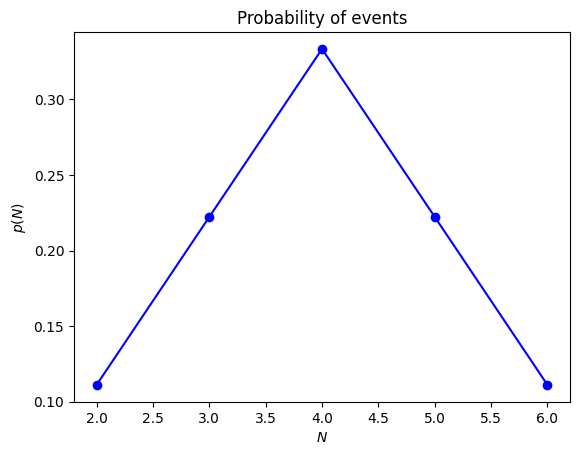

In [ ]:
plt.plot(lab, prob, 'o-',color = 'blue' )
plt.xlabel('$N$')
plt.ylabel('$p(N)$')
plt.title('Probability of events')
plt.show()


In [ ]:
def bosons(x , iter, memo = {}):
  seq = tuple(x + [iter], )

  if seq in memo:
    return memo[seq]
    
  if iter == 0:
    return []

  if iter == 1:
    return [[m] for m in x]

  l = []
  for y in bosons( x, iter - 1, memo ):
    for n in x:
      if y[-1] <= n:
        l.append(y + [n])
  memo[seq] = l  
  #print(memo)        
  return memo[seq]



In [ ]:
com = bosons([1,2,3], iter = 2)
s = np.sum(outcomes, axis = 1)
lab, prob = np.unique(s, return_counts = True)
prob = prob/len(s)

In [ ]:
for a,b in zip(com,s):
  print(a,',', 'N =' ,b)

[1, 1] , N = 2
[1, 2] , N = 3
[1, 3] , N = 4
[2, 2] , N = 4
[2, 3] , N = 5
[3, 3] , N = 6


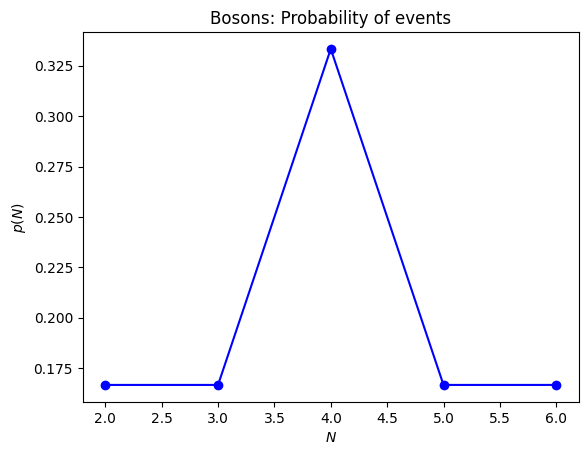

In [ ]:
plt.plot(lab, prob, 'o-',color = 'blue' )
plt.xlabel('$N$')
plt.ylabel('$p(N)$')
plt.title('Bosons: Probability of events')
plt.show()

In [ ]:
#def fermions(x , iter, memo = {}):
#  seq = tuple(x + [iter], )
#
#  if seq in memo:
#    return memo[seq]
#    
#  if iter == 0:
#    return []
#
#  if iter == 1:
#    return [[m] for m in x]
#
#  l = []
#  for y in fermions( x, iter - 1, memo ):
#    for n in x:
#      if y[-1] < n:
#        l.append(y + [n])
#  memo[seq] = l  
#  #print(memo)        
#  return memo[seq]  

In [ ]:
#com = fermions([1,2,3], iter = 2)
#s = np.sum(com, axis = 1)
#lab, prob = np.unique(s, return_counts = True)
#prob = prob/len(s)

In [ ]:
#for a,b in zip(com,s):
#  print(a,',', 'N =' ,b)

In [ ]:
#plt.plot(lab, prob, 'o-',color = 'blue' )
#plt.xlabel('$N$')
#plt.ylabel('$p(N)$')
#plt.title('Fermions: Probability of events')
#plt.show()

When rolling two dice in Bosons, there are six different legal turns, half of them are doubles (both numbers equal), while for plain old Distinguishable turns only one-third would be doubles; the probability of getting doubles is enhanced by 1.5 times in two-roll Bosons.
i.e.
$p_{B}(n_{1} = n_{2}) = \frac{3}{6} = \frac{1}{3}$ and $p_{D}(n_{1} = n_{2}) = \frac{3}{9} = \frac{1}{3}$

then $\frac{3}{2} p_{B}(n_{1} = n{2}) > p_{D}(n_{1} = n_{2})$



When rolling three dice in Bosons and in Distinguishable, there are the following legal turns:

In [ ]:
com1  = combinations([1,2,3], iter = 3)
s1 = np.sum(com1, axis = 1)
lab1, prob1 = np.unique(s1, return_counts = True)
prob1 = prob1/len(s1)

In [ ]:
#for a,b in zip(com1,s1):
#  print(a,',', 'N =' ,b)

for i, n in enumerate(com1):
  print(i+1,':', n)

1 : [1, 1, 1]
2 : [1, 1, 2]
3 : [1, 1, 3]
4 : [1, 2, 1]
5 : [1, 2, 2]
6 : [1, 2, 3]
7 : [1, 3, 1]
8 : [1, 3, 2]
9 : [1, 3, 3]
10 : [2, 1, 1]
11 : [2, 1, 2]
12 : [2, 1, 3]
13 : [2, 2, 1]
14 : [2, 2, 2]
15 : [2, 2, 3]
16 : [2, 3, 1]
17 : [2, 3, 2]
18 : [2, 3, 3]
19 : [3, 1, 1]
20 : [3, 1, 2]
21 : [3, 1, 3]
22 : [3, 2, 1]
23 : [3, 2, 2]
24 : [3, 2, 3]
25 : [3, 3, 1]
26 : [3, 3, 2]
27 : [3, 3, 3]


In [ ]:
com2  = bosons([1,2,3], iter = 3)
s2 = np.sum(com2, axis = 1)
lab2, prob2 = np.unique(s2, return_counts = True)
prob2 = prob2/len(s2)

In [ ]:
#for a,b in zip(com2,s2):
#  print(a,',', 'N =' ,b)
for i, n in enumerate(com2):
  print(i+1,':', n)

1 : [1, 1, 1]
2 : [1, 1, 2]
3 : [1, 1, 3]
4 : [1, 2, 2]
5 : [1, 2, 3]
6 : [1, 3, 3]
7 : [2, 2, 2]
8 : [2, 2, 3]
9 : [2, 3, 3]
10 : [3, 3, 3]


$3^{9}$ legal turns for Distinguisable and 10 for Bosons

Then we have $p_{D}(n_{1} = n_{2} = n_{3}) = \frac{3}{27} = \frac{1}{3}$ and $p_{B}(n_{1} = n_{2} = n_{3}) = \frac{3}{10}$ 

then $\frac{9}{10} p_{B}(n_{1} = n{2} = n_{3}) > p_{D}(n_{1} = n_{2} = n_{3})$

In the general case when rolling $M$ dice each with three dots we have $3^{M}$ legal turns and the probability of getting all the same rolls is

$p_{D}(n_{1} = \dots = n_{M}) = \frac{3}{3^{M}} = 3^{-M+1}$ while for the case of the Bosons, one can show there are $\left(\begin{array}{c}M +3 -1\\ M\end{array}\right)$ legal turns.

Then $p_{B}(n_{1} = \dots = n_{M}) = \frac{3}{\left(\begin{array}{c}M +3 -1\\ M\end{array}\right)} = \frac{3! M!}{(M+2)!}$ 

Notice that the states of the dice tend to cluster together in Bosons. Examples of real bosons clustering into the same state include Bose condensation and lasers.


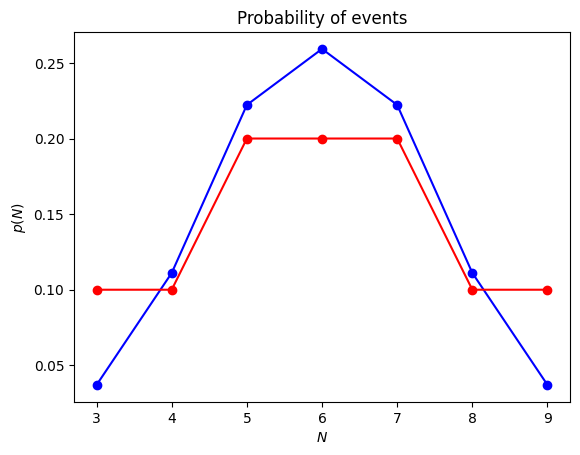

In [ ]:
plt.plot(lab1, prob1, 'o-',color = 'blue' )
plt.plot(lab2, prob2, 'o-',color = 'red' )
#plt.plot(lab3, prob3, 'o-',color = 'green' )

plt.xlabel('$N$')
plt.ylabel('$p(N)$')
plt.title('Probability of events')
plt.show()